---
title: "Multivariable equations"
format:
  ipynb: default
  html:
    code-fold: false
jupyter: python3
---  

::: {.callout-note icon=false}
## Questions
* How do I solve simultaneous ODEs?
* How do I solve second-order ODEs (and higher)?
:::

::: {.callout-note icon=false}
##  Objectives
* Use Euler's method, implemented in Python, to solve a set of simultaneous ODEs
* Use Euler's method, implemented in Python, to solve a second-order ODE
* Understand how the same method could be applied to higher order ODEs
:::

### Computers don't care so much about the type of differential equation

In the previous lesson we used Euler's method to model radioactive decay. To demonstrate the method we deliberately chose a simple example (a linear, first order, separable ODE with one dependent variable). We have seen that this equation can also be solved analytically, so really there is no need for approximate numerical methods in this case.

However there are a large number of physical equations that cannot be solved analytically, and that rely on numerical methods for their modelling. 

For example, the Lotka-Volterra equations for studying predator-prey interactions have multiple dependent variables and the Cahn-Hilliard equation for modelling phase separation in fluids is non-linear. These equations can be solved analytically for particular, special cases only.

Computers don't care whether an equation is linear or non-linear, multi-variable or single-variable, the numerical method for studying it is much the same - with the caveat that numerical methods are approximate and so we need to think about the accuracy of the methods used.

### Simultaneous ODEs can be solved using numerical methods

One class of problems that are difficult to solve analytically are <bold>simultaenous ODEs</bold>. These are equations where the derivative of each dependent variable can depend on any of the variables (dependent or independent). For example,

\begin{eqnarray}
\frac{\mathrm{d}x}{\mathrm{d}t} &=& xt + y \\
\frac{\mathrm{d}y}{\mathrm{d}t} &=& \mathrm{sin}^2\omega t - xy
\end{eqnarray}


A famous set of simulataneous ODEs are the <bold>Lorenz equations</bold>, which are the subject of this lesson.

\begin{eqnarray}
\frac{\mathrm{d}x}{\mathrm{d}t} &=& \sigma(y-x) \\
\frac{\mathrm{d}y}{\mathrm{d}t} &=& rx-y-xz \\
\frac{\mathrm{d}z}{\mathrm{d}t} &=& xy-bz
\end{eqnarray}

There three dependent variables - $x$, $y$ and $z$, and one independent variable $t$. There are also three constants -  $\sigma$, $r$ and $b$.

For particular values of $\sigma$, $r$ and $b$ the Lorenz systems has <bold>chaotic behaviour</bold> (a strong dependence on the initial conditions) and for a subset of these, there is also fractal structure called the <bold>strange attractor</bold>.

### Euler's method is easily extended to simultaneous ODEs

In the previous lesson we were introduced to Euler's method for the single variable case:

\begin{equation}
N(t+h) = N(t) + hf(N,t).
\end{equation}

This can be easily extended to the multi-variable case using vector notation:

\begin{equation}
\mathbf{r}(t+h) = \mathbf{r}(t) + h\mathbf{f}(\mathbf{r},t).
\end{equation}

We have seen that arrays can be easily represented in Python using the NumPy library. This allows us to do arithmetic with vectors directly (rather than using verbose workarounds such as `for` loops), so the code is not much more complicated than the one-variable case.

First, let's import the standard scientific libraries we will be using - Numpy and  Matplotlib:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now we define the function that describe the Lorenz system.

::: {.callout-note}
When the operands are NumPy arrays, the operations are automatically element-wise vector operations.
:::

In [2]:
# define the Lorenz system

def Lorenz(sigma,r,b,xyz):
    
    x = xyz[0]
    y = xyz[1]
    z = xyz[2]
    
    fx = sigma*(y-x)
    fy = (r*x)-y-(x*z)
    fz = (x*y)-(b*z)
    
    return np.array([fx,fy,fz],float)

Next we'll list the simulation parameters (start time, end time, number of time steps and step size), the initial values for $x$, $y$ and $z$, and the constants $\sigma$, $r$ and $b$.

In [51]:
# calculation parameters
start = 0                  # start time
end = 50                 # end time
num_steps = 3000         # number of time steps
h = (end-start) / num_steps  # time step size

# intitial conditions: x=0, y=1, z=0
xyz = np.array([0,1,0],float)

# constants
sigma = 10
r = 28
b = 8/3

We use the Numpy `arange` function to generate a list of evenly spaced times at which to evaluate the system. We also create  an empty list to hold the values for $x$, $y$ and $z$ that we are yet to calculate.

In [52]:
# use the Numpy arange function to generate a list of evenly spaced times at which to evaluate the number of atoms N.
time_list = np.arange(start,end,h)

# create empty arrays to hold the calculated values
x_points = []
y_points = []
z_points = []

Finally, we apply Euler's method using a `For` loop. Note that the order of operations in the loop body is important.

In [53]:
for time in time_list:
    
    x_points.append(xyz[0])
    y_points.append(xyz[1])
    z_points.append(xyz[2])
    xyz += h*Lorenz(sigma,r,b,xyz)

To visualise the strange attractor we can plot the values of $z$ against $y$:

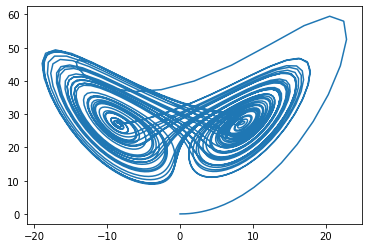

In [54]:
plt.plot(x_points,z_points)

### Higher order ODEs can be re-cast as simultaneous ODEs and solved in the same way

Many physical equations are second-order or higher. The general form for a second-order differential equation with one dependent variable is:

\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2} = f\left(x,\frac{\mathrm{d}x}{\mathrm{d}t},t\right)
\end{equation}

Luckily, we can re-cast a higher order equation as a set of simultaneous equations, and then solve in the same way as above.

Let's use the non-linear pendulum as an example. For a pendulum with an art of length $l$ and a bob of mass $m$, Newton's second law ($F=ma$) provides the following equation of motion:

\begin{equation}
ml\frac{\mathrm{d}^2\theta}{\mathrm{d}t^2} = -mg\sin(\theta),
\end{equation}

where $\theta$ is the angle of displacement of the arm from the vertical and $l\frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}$ is the acceleration of the mass in the tangential direction. The exact solution to this equation is unknown, but we now have the knowledge needed to find a numerical approximation.

The equation can be re-written as:

\begin{equation}
\frac{\mathrm{d}^2\theta}{\mathrm{d}t^2} = -\frac{g}{l}\sin(\theta)
\end{equation}

We define a new variable $\omega$:

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d}t} = \omega
\end{equation}

and substitute this into the equation of motion:

\begin{equation}
\frac{\mathrm{d}\omega}{\mathrm{d}t} = -\frac{g}{l}\sin(\theta).
\end{equation}

These two expressions form a set of simultaneous equations that can be solved numerically using the method outlined above.


::: {.callout-note icon=false}
##  Keypoints

- Computers don't care so much about the type of differential equation
- Simulatenous ODEs can also be solved using numerical methods
- Euler's method is easily extended to the multi-variable case
- Higher order ODEs can be re-cast as simultaneous ODEs and solved the same way
:::